###PROJECT - SQL(IMDB DATASET)

###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the count of each genre present in IMDB movie dataset?

Print the Genre and number of movies present in that genre.

Note: Ignore the empty value present in genre.

Output Format:
genre_1 num_movie_1
genre_2 num_movie_2
. . .
. . .

In [7]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from genre', a)
b = data.groupby('genre').count()
c = b.drop(b.index[0])
d = c.sort_values(by = 'Movie_id', ascending = False)
for i in range(len(d)):
    print(d.index[i],d.values[i][0])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Animation 13
Romance 13
Crime 11
Mystery 7
Fantasy 7
History 6
Music 3
Family 3
Sport 3
War 2
Horror 2
Western 2
Musical 1


###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.

Print the rating of that movie.

Output Format:
rating

In [8]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from earning', a)
rating  = pd.read_sql_query('Select * from IMDB', a)
data['Domestic_Worldwide'] = data['Domestic'] +data['Worldwide']
b = data.sort_values(by = 'Domestic_Worldwide', ascending  = False).head(1)
b['Movie_id']
print(*rating[rating['Movie_id'] == '38626'].Rating)

8.1


###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the most voted movie in IMDB Movie Database.

Print the movie name and the rating of that movie.

Output Format:
movie_name rating

In [9]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('Select * from IMDB', a)
b = data.sort_values(by = 'TotalVotes', ascending = False).head(1)
print(*b['Title'], *b['Rating'], end = '')

Inception (2010) 8.8

###Problem statement
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the Movie with Longest-Running Time from IMDB Movie database.

Print the name of movie and running time as integer value.

Note: Don't print 'min' in running time. Output Format:
movie_name running_time

In [10]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from IMDB', a)
data['Runtime'] = data['Runtime'].str.replace('min', '')
data[data['Runtime'] == ''] = '0'
data['Runtime'] = data['Runtime'].astype(int)
b = data[['Title', 'Runtime']]
c = b.sort_values(by = 'Runtime', ascending = False).head(1)
print(c.to_string(index = False, header = False))

The Wolf of Wall Street (2013) 180


###Problem statement
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has maximum net profit in IMDB Movie Database.

Print the movie name.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

Output Format:
movie_name

In [11]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from earning', a)
rating  = pd.read_sql_query('Select * from IMDB', a)
data['Domestic_Worldwide'] = data['Domestic'] + data['Worldwide']
c = rating[['Movie_id', 'Title', 'Budget']]
b = data[['Movie_id','Domestic_Worldwide']]
d = pd.merge(c, b, on = 'Movie_id')
d['Domestic_Worldwide'] = d['Domestic_Worldwide'].astype(float)
d['Budget'][d['Budget'] == ''] = 0
d['Budget'] = d['Budget'].astype(float)
d['Net_Profit'] = d['Domestic_Worldwide'] - d['Budget']
f = d.sort_values(by = 'Net_Profit', ascending  = False )
print(f['Title'].values[0])

Star Wars: The Force Awakens (2015)


<ipython-input-11-f9d92e7e4196>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Budget'][d['Budget'] == ''] = 0


###Problem statement
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the least budgeted movie in IMDB Movie Database.

If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

Output Format:
movie_name

In [12]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from earning', a)
rating  = pd.read_sql_query('Select * from IMDB', a)
data['Domestic_Worldwide'] = data['Domestic'] + data['Worldwide']
c = rating[['Movie_id', 'Title', 'Budget']]
b = data[['Movie_id','Domestic_Worldwide']]
d = pd.merge(c, b, on = 'Movie_id')
d['Domestic_Worldwide'] = d['Domestic_Worldwide'].astype(float)
d['Budget'][d['Budget'] == ''] = 0
d['Budget'] = d['Budget'].astype(float)
d['Net_Profit'] = d['Domestic_Worldwide'] - d['Budget']
e = d.sort_values(by = 'Budget')
f = e.drop(e.index[[0, 1, 2]])
g = f[f['Budget'] == 1000000.0 ]
print(g['Title'].values[0])

Short Term 12 (2013)


<ipython-input-12-0fc8479f5d85>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Budget'][d['Budget'] == ''] = 0


###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

Print the Year and name of the movie which was the highest grosser in that year.

Note:Print the year in ascending order.

Output Format:
year_1 name_movie_1
year_2 name_movie_2
year_3 name_movie_3
. . .
. . .

In [13]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('select * from earning join IMDB using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']

def year(title):
    return int(title.strip().split(" ")[-1][-5:-1])

data['Year'] = data["Title"].apply(year)
data['Year'].unique()

m = data.groupby('Year')['Total'].max()

d = {}
for i in range(len(data['Total'])):
    if data['Total'][i] in (m.values):
        key = data['Year'][i]
        value = data['Title'][i]
        d[key] = value

for i  in sorted(d):
    print(i,d[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

Output Format:
genre_1 percent_1
genre_2 percent_2
. . .
. . .

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


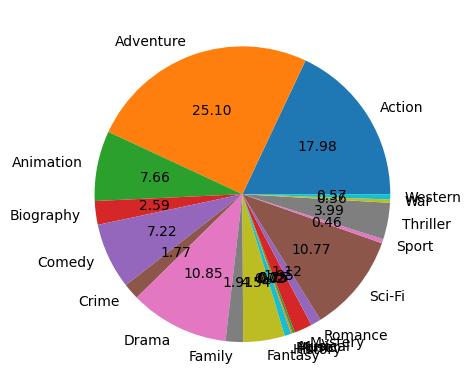

In [14]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('Select * from IMDB join genre using(Movie_id)',db)

data['Budget'].replace("",0,inplace=True)
data.Budget.unique()

data["genre"].replace('',np.NaN,inplace=True)
data.dropna(subset = ["genre"],inplace=True)
grouped_sum = data.groupby("genre")["Budget"].sum()

for i in range(len(grouped_sum)):
    percentage=grouped_sum.values[i]/(sum(grouped_sum))*100
    print(grouped_sum.index[i],format(percentage,".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()

###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Output Format:
genre_1 percent_1
genre_2 percent_2
. . .
. . .

<ipython-input-16-fa2bd3fd5164>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['genre'][c['genre'] == ''] = 0


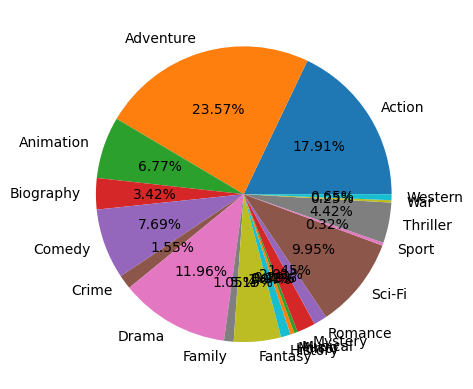

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from earning', a)
budget = pd.read_sql_query('Select * from genre', a)
data['Domestic_Worldwide'] = data['Domestic'] + data['Worldwide']
b = pd.merge(data, budget, on = 'Movie_id')
c = b[['genre', 'Domestic_Worldwide']]
c['genre'][c['genre'] == ''] = 0
d = c.groupby('genre', as_index = False)['Domestic_Worldwide'].sum()
e = d.drop(d.index[0])
plt.pie(e['Domestic_Worldwide'], labels = e['genre'], autopct = '%.2f%%')
plt.show()
j = sum(e['Domestic_Worldwide'])
for i in range(int(len(e['Domestic_Worldwide']))) :
    print(e['genre'].values[i], round(((e['Domestic_Worldwide'].values[i]) / j)* 100, 2))

###Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.

Note:
Use the condition "or".
Print the movie name.

Movies has multiple genre.

Output Format:

movie_name

In [17]:
import sqlite3
import pandas as pd
a = sqlite3.connect('IMDB.sqlite')
data  = pd.read_sql_query('Select * from genre', a)
rating  = pd.read_sql_query('Select * from IMDB', a)
b = data[(data['genre'] == 'Sci-Fi') | (data['genre'] ==  'Mystery')]
c = rating[['Movie_id', 'Rating', 'Title']]
d = pd.merge(b, c, on = 'Movie_id')
e = d[d['Rating'] >= 8.0]
print(e['Title'].values[1])


Arrival (2016)
